<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [39]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [40]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [41]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [42]:
#Calculamos el numero total de la población "n"
Mexico['host_acceptance_rate']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: host_acceptance_rate
Non-Null Count  Dtype 
--------------  ----- 
22791 non-null  object
dtypes: object(1)
memory usage: 206.4+ KB


In [43]:
Mexico['host_acceptance_rate'] = pd.to_numeric(
    Mexico['host_acceptance_rate'].astype(str).str.replace('%', ''),
    errors='coerce'
)

In [44]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['host_acceptance_rate'].max()
Min=Mexico['host_acceptance_rate'].min()
Limites= [Min, Max]
Limites

[0.0, 100.0]

In [45]:
#Calculamos el rango R
R=Max-Min
R

100.0

In [46]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [47]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

6.377640644157816

**Creación de Categorias a partir de clases**

In [48]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 100.1, 16)
intervalos

array([-1.000e-01,  6.580e+00,  1.326e+01,  1.994e+01,  2.662e+01,
        3.330e+01,  3.998e+01,  4.666e+01,  5.334e+01,  6.002e+01,
        6.670e+01,  7.338e+01,  8.006e+01,  8.674e+01,  9.342e+01,
        1.001e+02])

In [49]:
#Creamos las categorías 
categorias= ["Categoría1 (0-6.5 host_acceptance_rate)", "Categoría2 (6.6-1.3 host_acceptance_rate)","Categoría3 (1.4-1.99 host_acceptance_rate)", "Categoría4 (2-2.6 host_acceptance_rate)",
             "Categoría5 (2.7-3.3 host_acceptance_rate)", "Categoría6 (3.4-3.9 host_acceptance_rate)","Categoría7 (4-4.6 host_acceptance_rate)", "Categoría8 (4.7-5.3 host_acceptance_rate)", "Categoría9 (5.4-6 host_acceptance_rate)", "Categoría10 (6.1-6.6 host_acceptance_rate)","Categoría11 (6.7-7.3 host_acceptance_rate)", "Categoría12 (7.4-8 host_acceptance_rate)",
             "Categoría13 (8.1-8.6 host_acceptance_rate)", "Categoría14 (8.7-9.3 host_acceptance_rate)","Categoría15 (9.4-1 host_acceptance_rate)"
             ]

In [50]:
#Finalmente creamos las categorías en la columna numérica
Mexico['host_acceptance_rate']=pd.cut(x= Mexico['host_acceptance_rate'], bins=intervalos, labels= categorias)
Mexico['host_acceptance_rate']

0                                               NaN
1        Categoría14 (8.7-9.3 host_acceptance_rate)
2          Categoría15 (9.4-1 host_acceptance_rate)
3         Categoría8 (4.7-5.3 host_acceptance_rate)
4        Categoría13 (8.1-8.6 host_acceptance_rate)
                            ...                    
26396      Categoría15 (9.4-1 host_acceptance_rate)
26397      Categoría15 (9.4-1 host_acceptance_rate)
26398      Categoría15 (9.4-1 host_acceptance_rate)
26399      Categoría15 (9.4-1 host_acceptance_rate)
26400                                           NaN
Name: host_acceptance_rate, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-6.5 host_acceptance_rate)' < 'Categoría2 (6.6-1.3 host_acceptance_rate)' < 'Categoría3 (1.4-1.99 host_acceptance_rate)' < 'Categoría4 (2-2.6 host_acceptance_rate)' ... 'Categoría12 (7.4-8 host_acceptance_rate)' < 'Categoría13 (8.1-8.6 host_acceptance_rate)' < 'Categoría14 (8.7-9.3 host_acceptance_rate)' < 'Categoría15 (9.4-1 h

In [51]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['host_acceptance_rate'].value_counts().reset_index()
Tabla_freq

host_acceptance_rate  count
0     Categoría15 (9.4-1 host_acceptance_rate)  17142
1   Categoría14 (8.7-9.3 host_acceptance_rate)   1453
2      Categoría1 (0-6.5 host_acceptance_rate)   1100
3   Categoría13 (8.1-8.6 host_acceptance_rate)    640
4     Categoría12 (7.4-8 host_acceptance_rate)    583
5   Categoría11 (6.7-7.3 host_acceptance_rate)    403
6    Categoría8 (4.7-5.3 host_acceptance_rate)    310
7   Categoría10 (6.1-6.6 host_acceptance_rate)    299
8      Categoría7 (4-4.6 host_acceptance_rate)    262
9      Categoría9 (5.4-6 host_acceptance_rate)    174
10   Categoría5 (2.7-3.3 host_acceptance_rate)    141
11     Categoría4 (2-2.6 host_acceptance_rate)     94
12   Categoría2 (6.6-1.3 host_acceptance_rate)     77
13  Categoría3 (1.4-1.99 host_acceptance_rate)     71
14   Categoría6 (3.4-3.9 host_acceptance_rate)     42

In [52]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

host_acceptance_rate  count
0     Categoría15 (9.4-1 host_acceptance_rate)  17142
1   Categoría14 (8.7-9.3 host_acceptance_rate)   1453
2      Categoría1 (0-6.5 host_acceptance_rate)   1100
3   Categoría13 (8.1-8.6 host_acceptance_rate)    640
4     Categoría12 (7.4-8 host_acceptance_rate)    583
5   Categoría11 (6.7-7.3 host_acceptance_rate)    403
6    Categoría8 (4.7-5.3 host_acceptance_rate)    310
7   Categoría10 (6.1-6.6 host_acceptance_rate)    299
8      Categoría7 (4-4.6 host_acceptance_rate)    262
9      Categoría9 (5.4-6 host_acceptance_rate)    174
10   Categoría5 (2.7-3.3 host_acceptance_rate)    141
11     Categoría4 (2-2.6 host_acceptance_rate)     94
12   Categoría2 (6.6-1.3 host_acceptance_rate)     77
13  Categoría3 (1.4-1.99 host_acceptance_rate)     71
14   Categoría6 (3.4-3.9 host_acceptance_rate)     42

In [53]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_acceptance_rate')
Filtro_index

count
host_acceptance_rate                             
Categoría15 (9.4-1 host_acceptance_rate)    17142
Categoría14 (8.7-9.3 host_acceptance_rate)   1453
Categoría1 (0-6.5 host_acceptance_rate)      1100
Categoría13 (8.1-8.6 host_acceptance_rate)    640
Categoría12 (7.4-8 host_acceptance_rate)      583
Categoría11 (6.7-7.3 host_acceptance_rate)    403
Categoría8 (4.7-5.3 host_acceptance_rate)     310
Categoría10 (6.1-6.6 host_acceptance_rate)    299
Categoría7 (4-4.6 host_acceptance_rate)       262
Categoría9 (5.4-6 host_acceptance_rate)       174
Categoría5 (2.7-3.3 host_acceptance_rate)     141
Categoría4 (2-2.6 host_acceptance_rate)        94
Categoría2 (6.6-1.3 host_acceptance_rate)      77
Categoría3 (1.4-1.99 host_acceptance_rate)     71
Categoría6 (3.4-3.9 host_acceptance_rate)      42

Text(0, 0.5, 'Frecuencia')

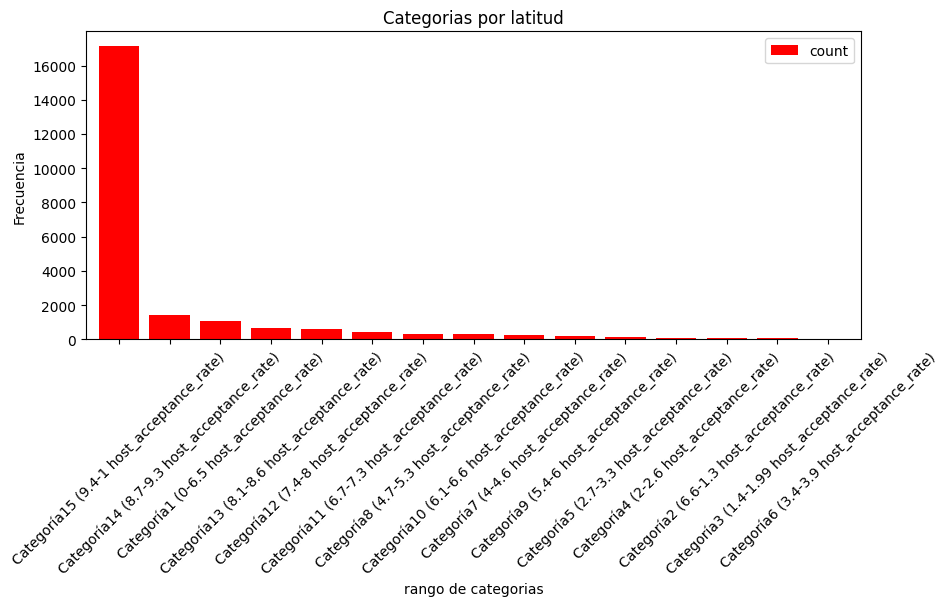

In [54]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')